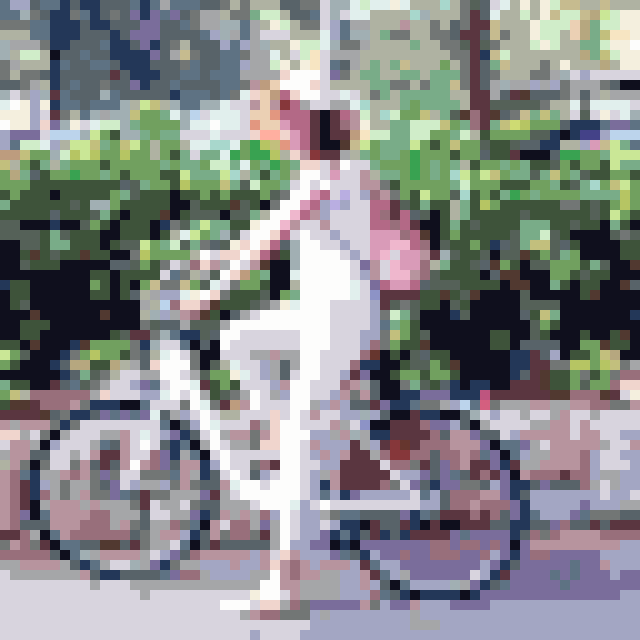

In [141]:
from IPython.display import display
from PIL import Image,ImageColor,ImageEnhance,ImageDraw,ImageFont
import colorsys
import palette
import csv
import numpy as np

title_font = ImageFont.truetype('Playfair_Display/PlayfairDisplay-VariableFont_wght.ttf', 9)

im_init = Image.open(r'./kalan_bycicle_3.png')
im_init = im_init.convert('RGB') 

display(im_init)


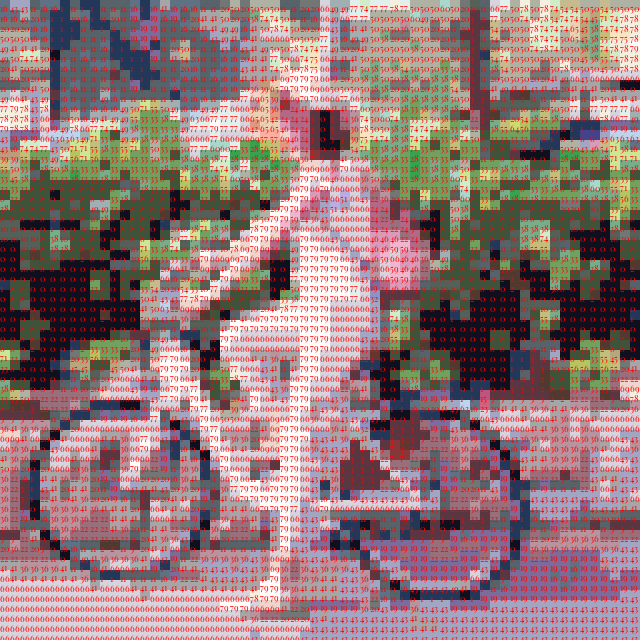

In [142]:
def clamp(x): 
    return max(0, min(x, 255))

def convertToHex(r,g,b):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

pixelMap = im_init.load()
foo = palette.colors
image_editable = ImageDraw.Draw(im_init)
#display(im_init)

#list(foo.keys())[list(foo.values()).index('#66362e')]
csv_arr = []
for i in range(5,im_init.size[0],10):
    csv_row = []
    for j in range(5,im_init.size[1],10):
            col = pixelMap[i,j]
            hex = convertToHex(col[0],col[1],col[2])
            try:
                num = list(foo.keys())[list(foo.values()).index(hex)]
            except ValueError:
                num = '?'        
            
            image_editable.text((i-5,j-3), num, (255, 0, 0), font=title_font)
            csv_row.append(num)
    
    csv_arr.append(csv_row)

im_init

In [146]:
l_2d = np.array(csv_arr).T
csv_arr = np.array(l_2d).tolist()

with open("new_file.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=';')
    csvWriter.writerows(csv_arr)


In [145]:
l_2d

array([['16', '43', '43', ..., '50', '50', '50'],
       ['16', '16', '49', ..., '74', '78', '78'],
       ['20', '20', '20', ..., '74', '78', '78'],
       ...,
       ['66', '66', '66', ..., '43', '43', '43'],
       ['66', '66', '66', ..., '43', '43', '43'],
       ['66', '66', '66', ..., '43', '43', '43']], dtype='<U2')

In [126]:
for k in range(5,100,10):
    print(k)

5
15
25
35
45
55
65
75
85
95
